# Classifier Visualization Playground

The data used in this notebook is based on the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. 

In order to better vizualize the decision boundaries, we'll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions. 

Play around with different models and parameters to see how they affect the classifier's decision boundary and accuracy!

<IPython.core.display.Javascript object>


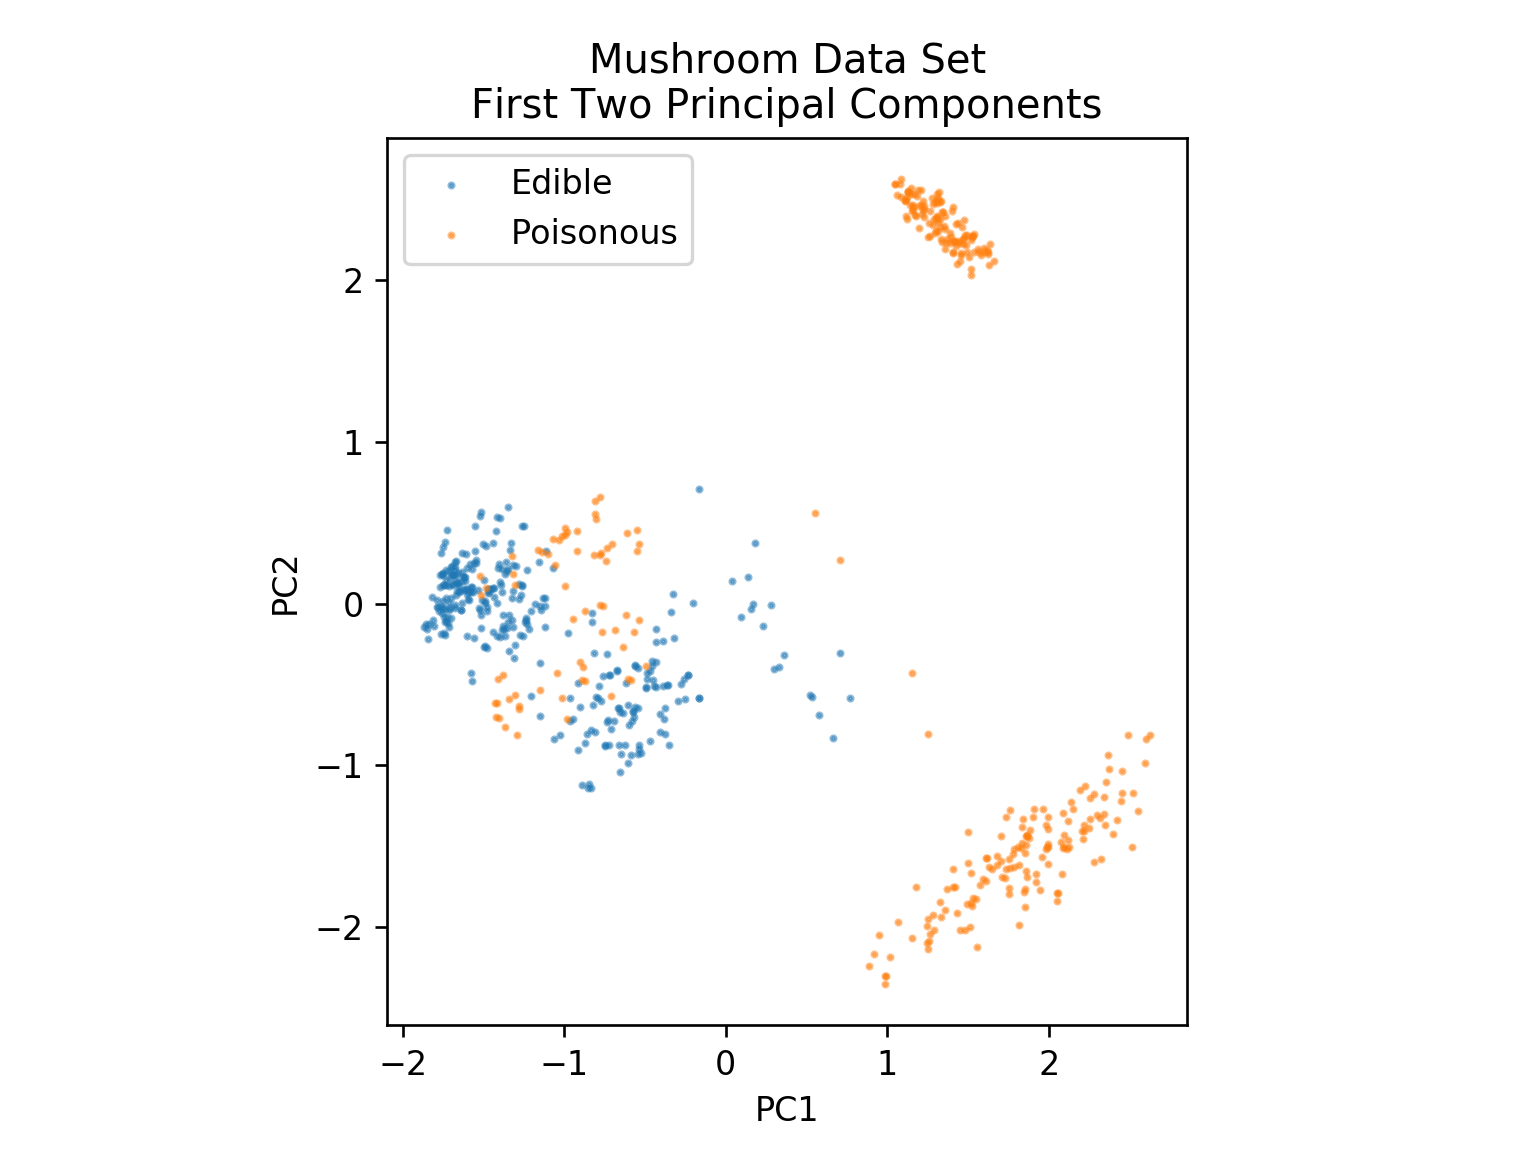

In [29]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('mushrooms.csv')

# Convert categorical variable into dummy/indicator variables.
df2 = pd.get_dummies(df)

# take 0.08 x total samples 
df3 = df2.sample(frac=0.08)

# # Single selections using iloc and DataFrame
# # Rows:
# data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
# data.iloc[1] # second row of data frame (Evan Zigomalas)
# data.iloc[-1] # last row of data frame (Mi Richan)
# # Columns:
# data.iloc[:,0] # first column of data frame (first_name)
# data.iloc[:,1] # second column of data frame (last_name)
# data.iloc[:,-1] # last column of data frame (id)

# all columns from the third column
X = df3.iloc[:,2:]
# second column of data frame
y = df3.iloc[:,1]

# Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Return the dtypes in the DataFrame, The data type of each column
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
df2.describe()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.482029,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df2.head(25)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [12]:
df2.shape

(8124, 119)

In [11]:
df3.shape

(650, 119)

In [15]:
print(X.shape,y.shape)

(650, 117) (650,)


In [18]:
df3.head(25)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1459,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7545,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1403,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7357,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5938,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1461,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
6027,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4628,0,1,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
6095,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1978,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1459,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
7545,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1403,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7357,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5938,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1461,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
6027,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4628,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
6095,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1978,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
y

1459    1
7545    1
1403    0
7357    1
5938    0
1461    0
6027    1
4628    1
6095    1
1978    0
6173    1
3589    0
1139    0
3746    1
2638    0
5947    1
5145    1
6527    1
5165    1
97      0
1778    1
6953    1
3130    0
6635    1
4890    1
2768    0
7832    1
3097    1
7202    0
7213    1
       ..
7912    0
4513    1
4553    1
578     0
1393    0
5024    1
3148    1
5803    1
8122    1
4207    1
4084    1
2975    0
2815    0
6882    1
4626    1
3751    1
5875    0
6122    1
228     1
3676    0
7414    1
7578    1
2034    0
4698    1
2176    0
3155    0
7423    1
5971    1
5686    0
4027    1
Name: class_p, Length: 650, dtype: uint8

In [58]:
print(type(pca))

<class 'numpy.ndarray'>


In [56]:
# how to use enumerate
# It allows us to loop over something and have an automatic counter.
# my_list = ['apple', 'banana', 'grapes', 'pear']
# for c, value in enumerate(my_list, 1):
#     print(c, value)
# Output:
# 1 apple
# 2 banana
# 3 grapes
# 4 pear

def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

<IPython.core.display.Javascript object>


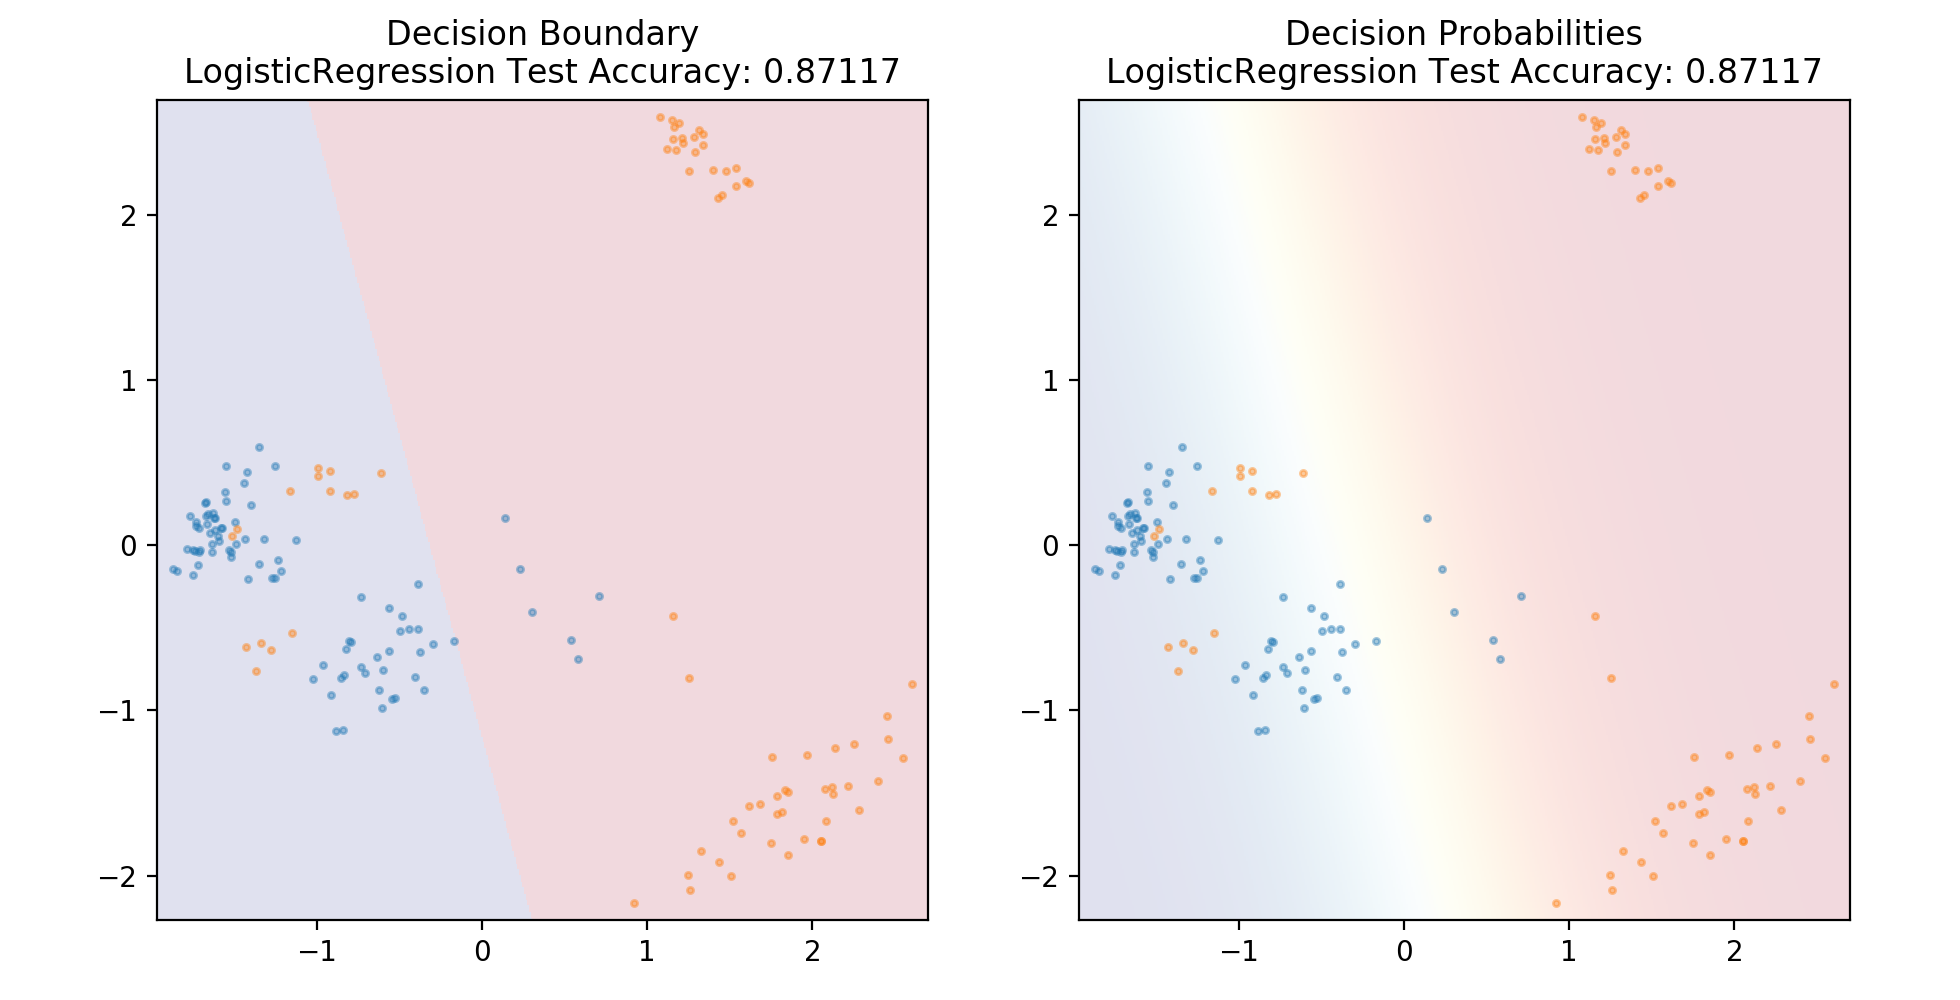

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


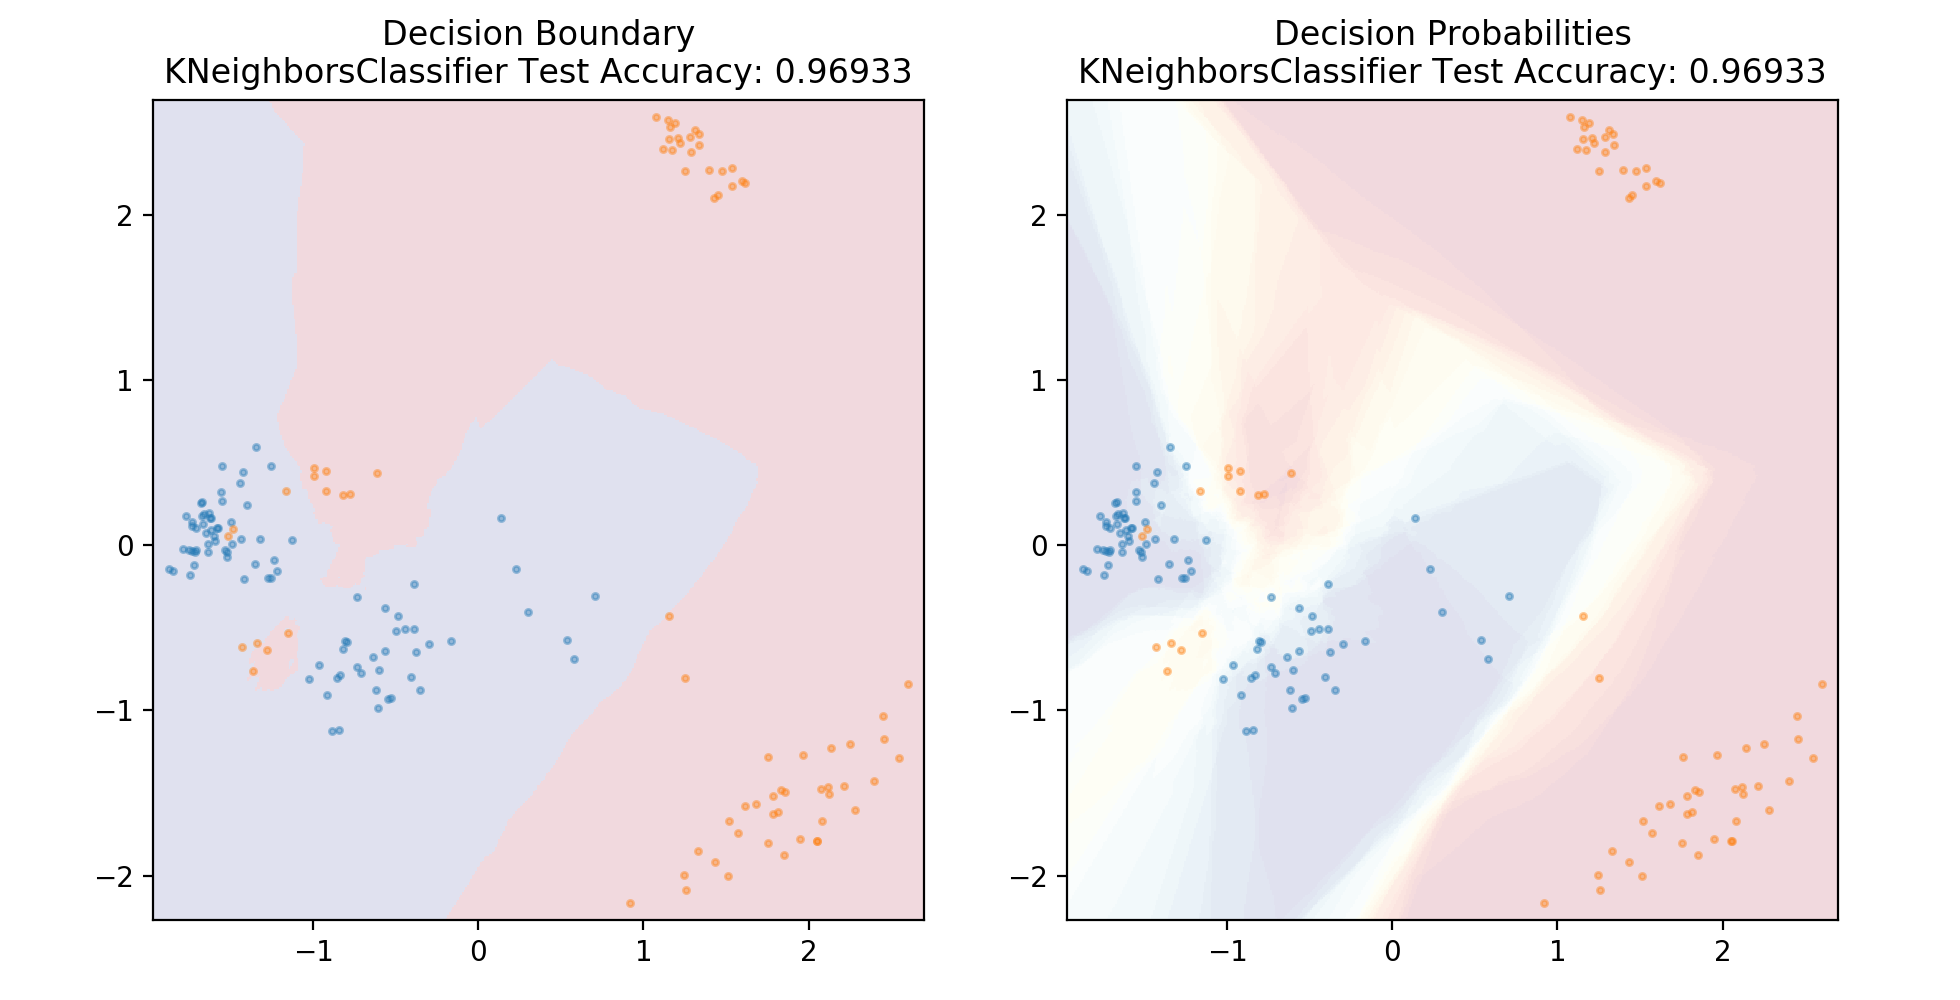

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


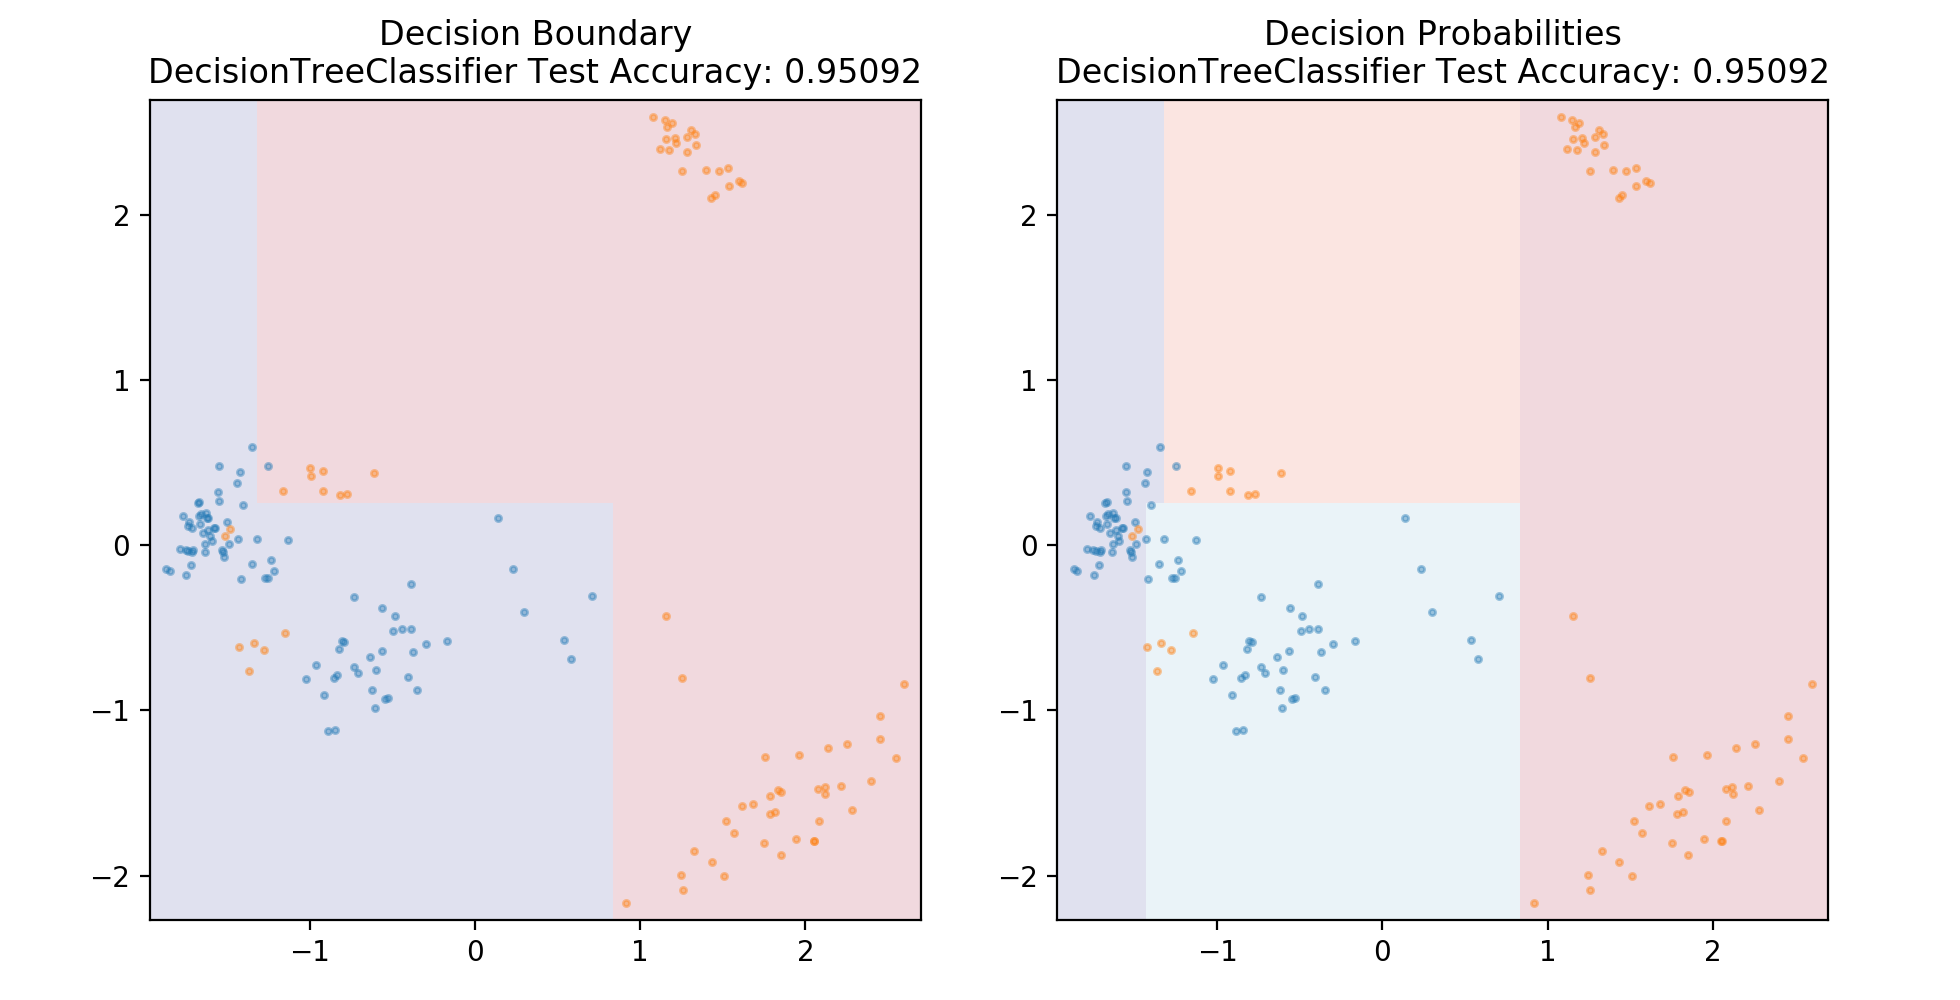

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


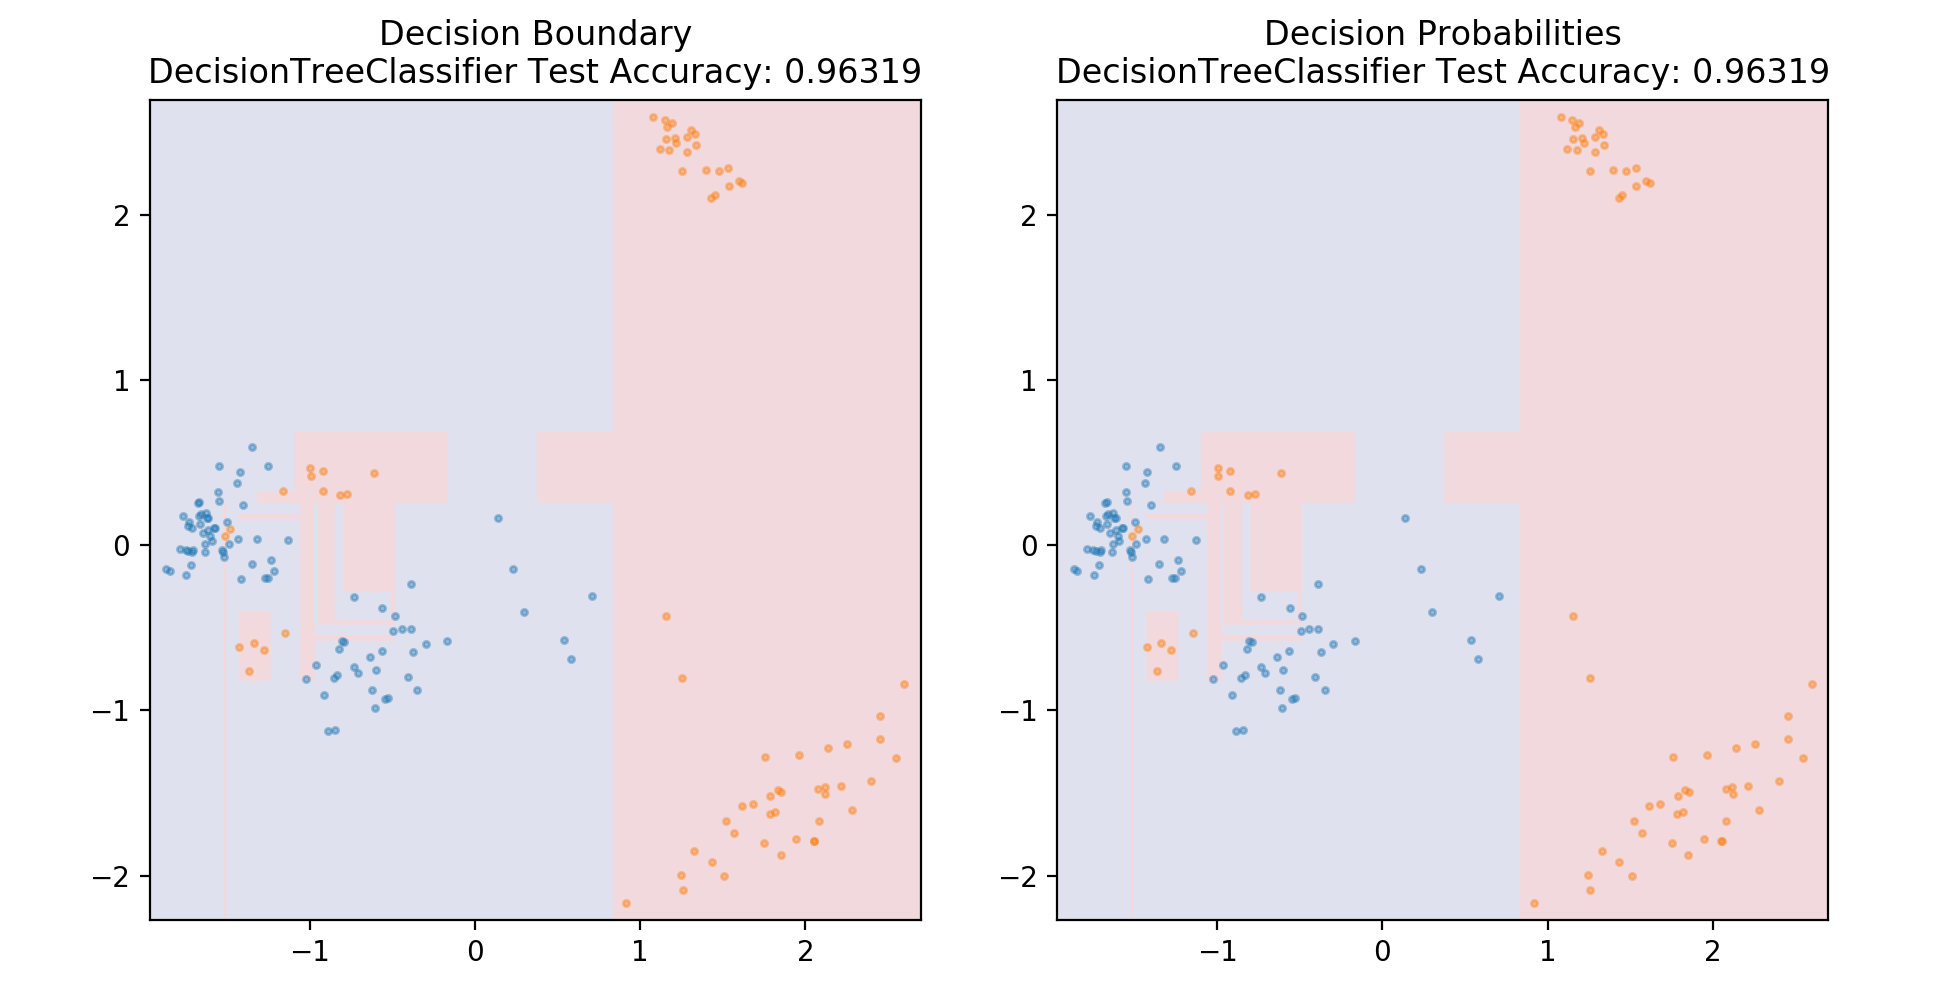

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


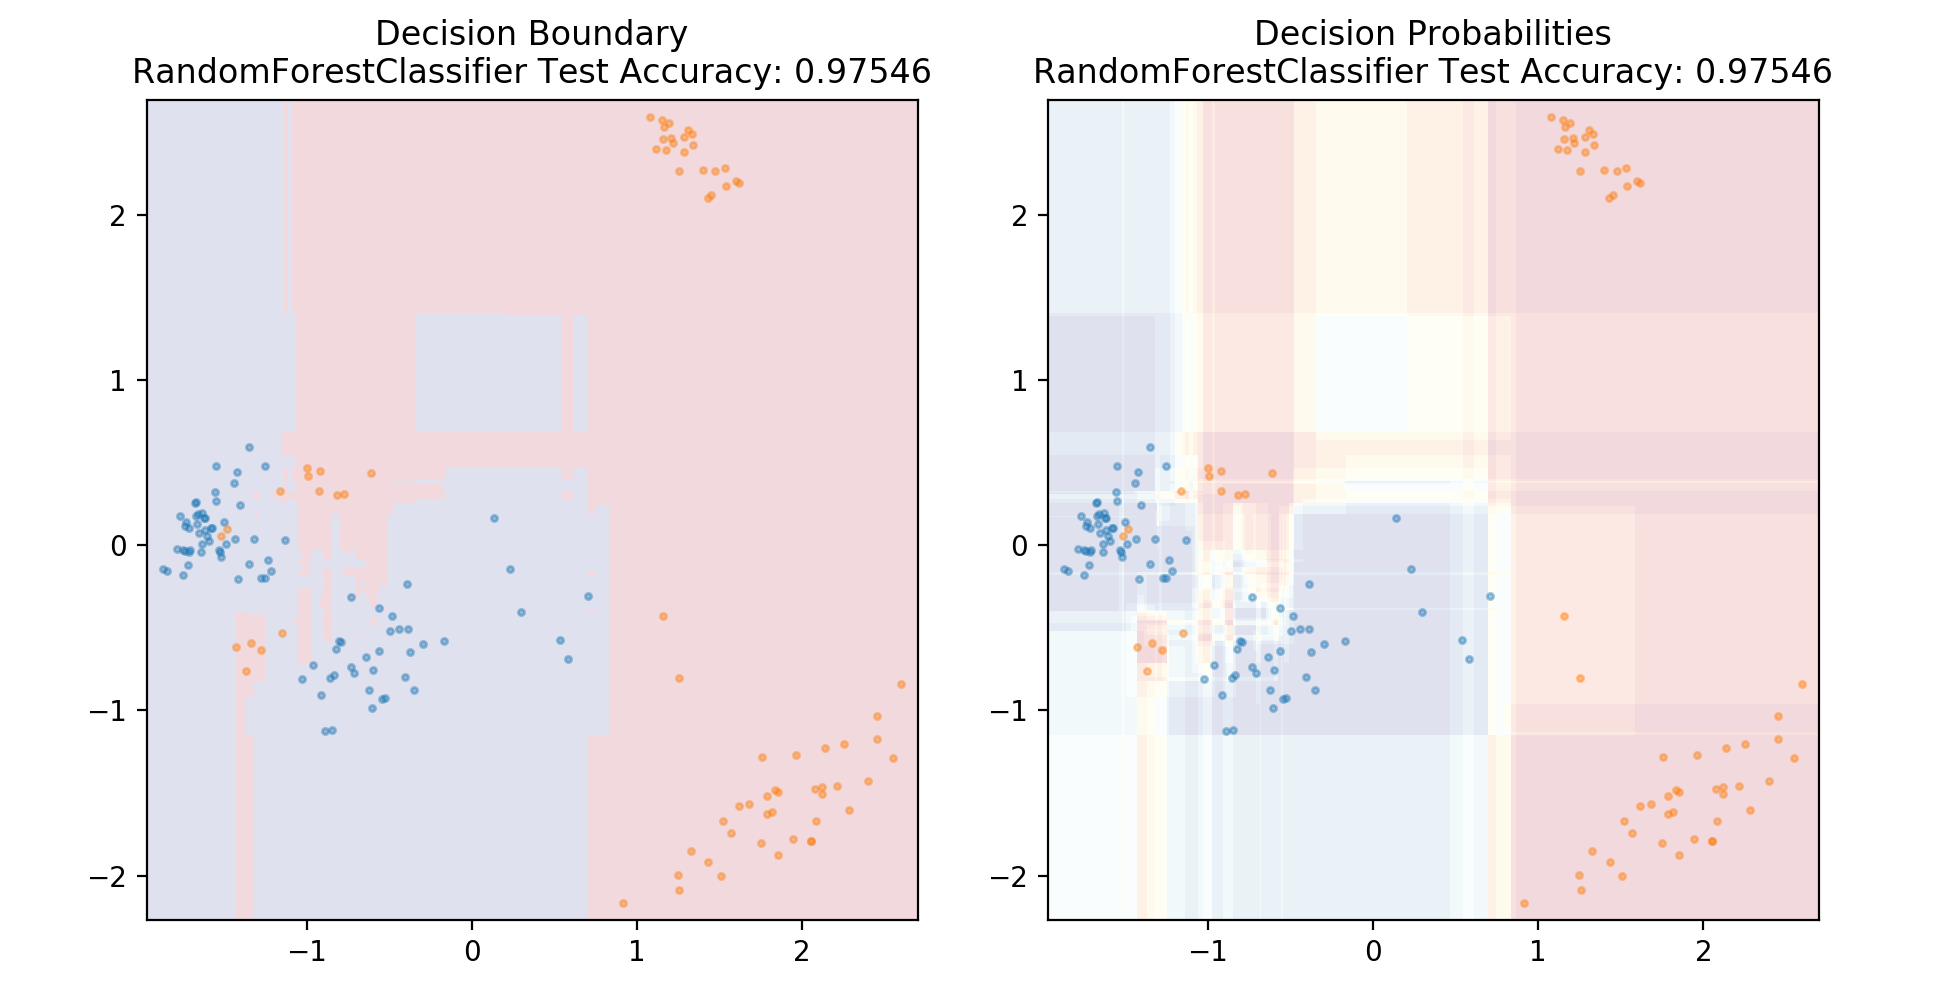

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


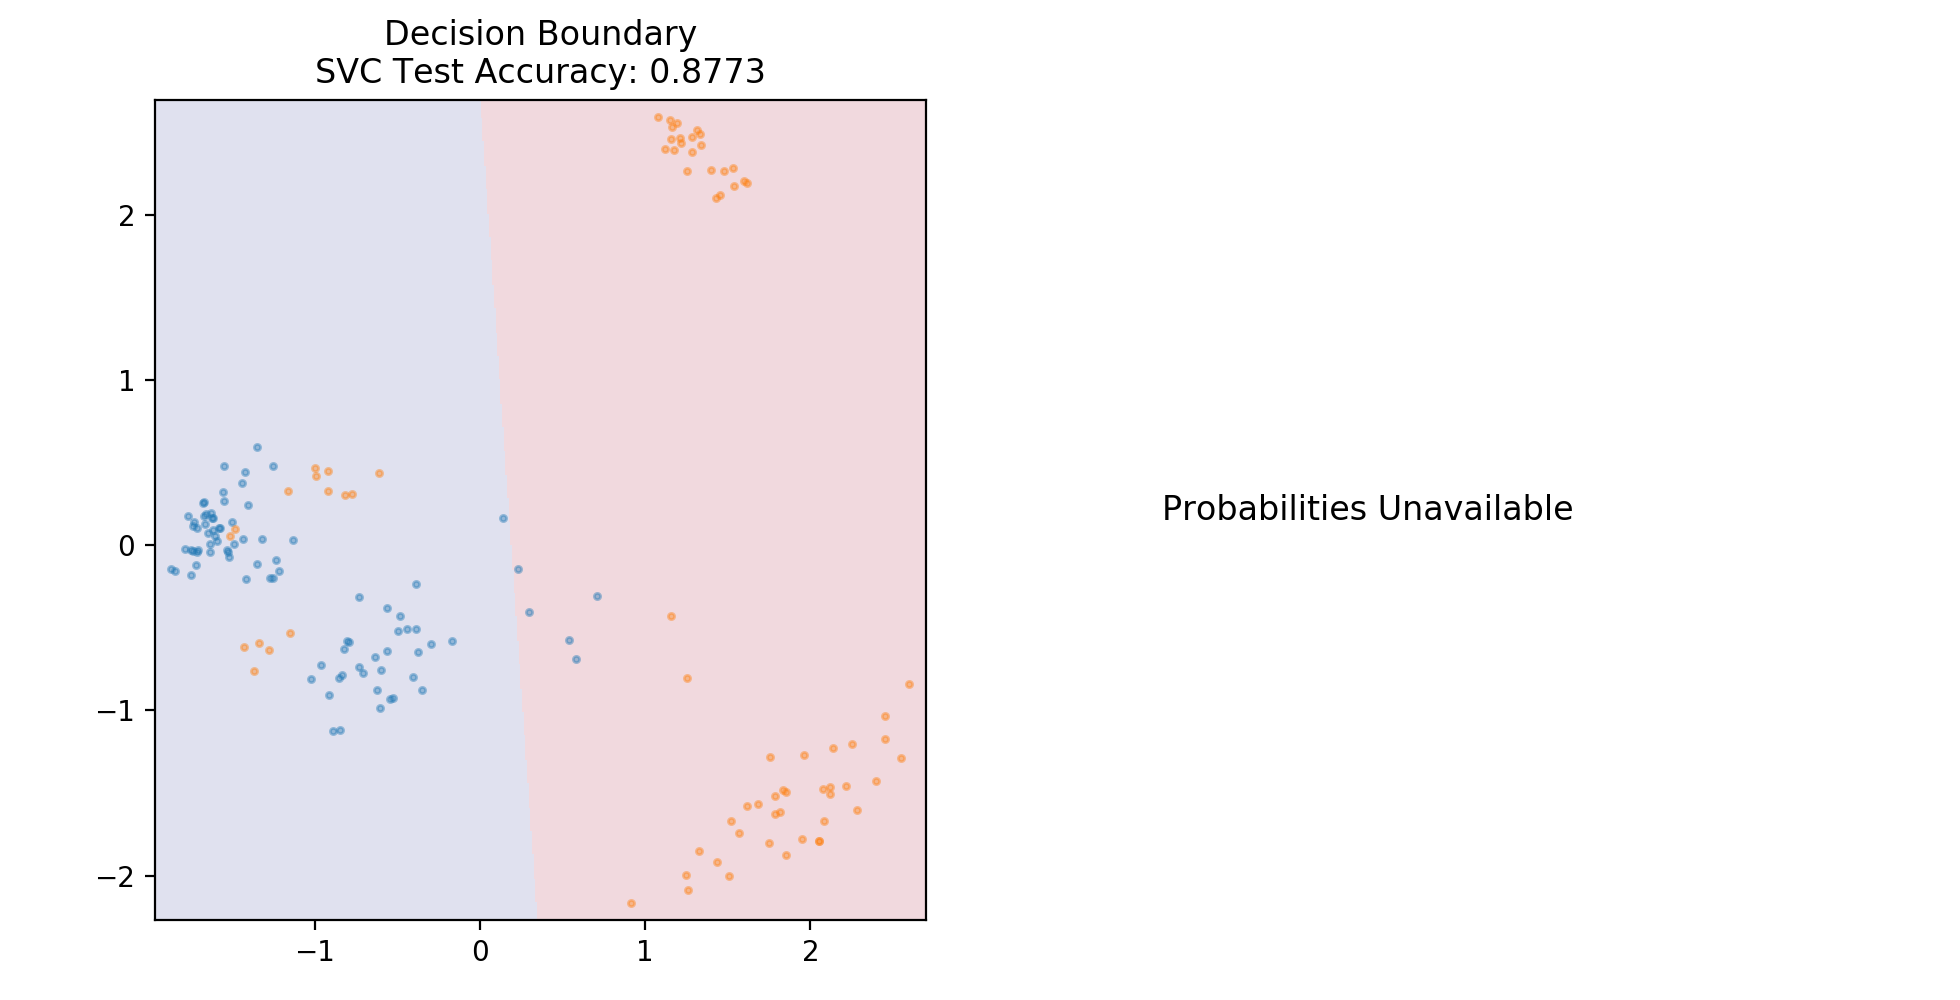

In [43]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


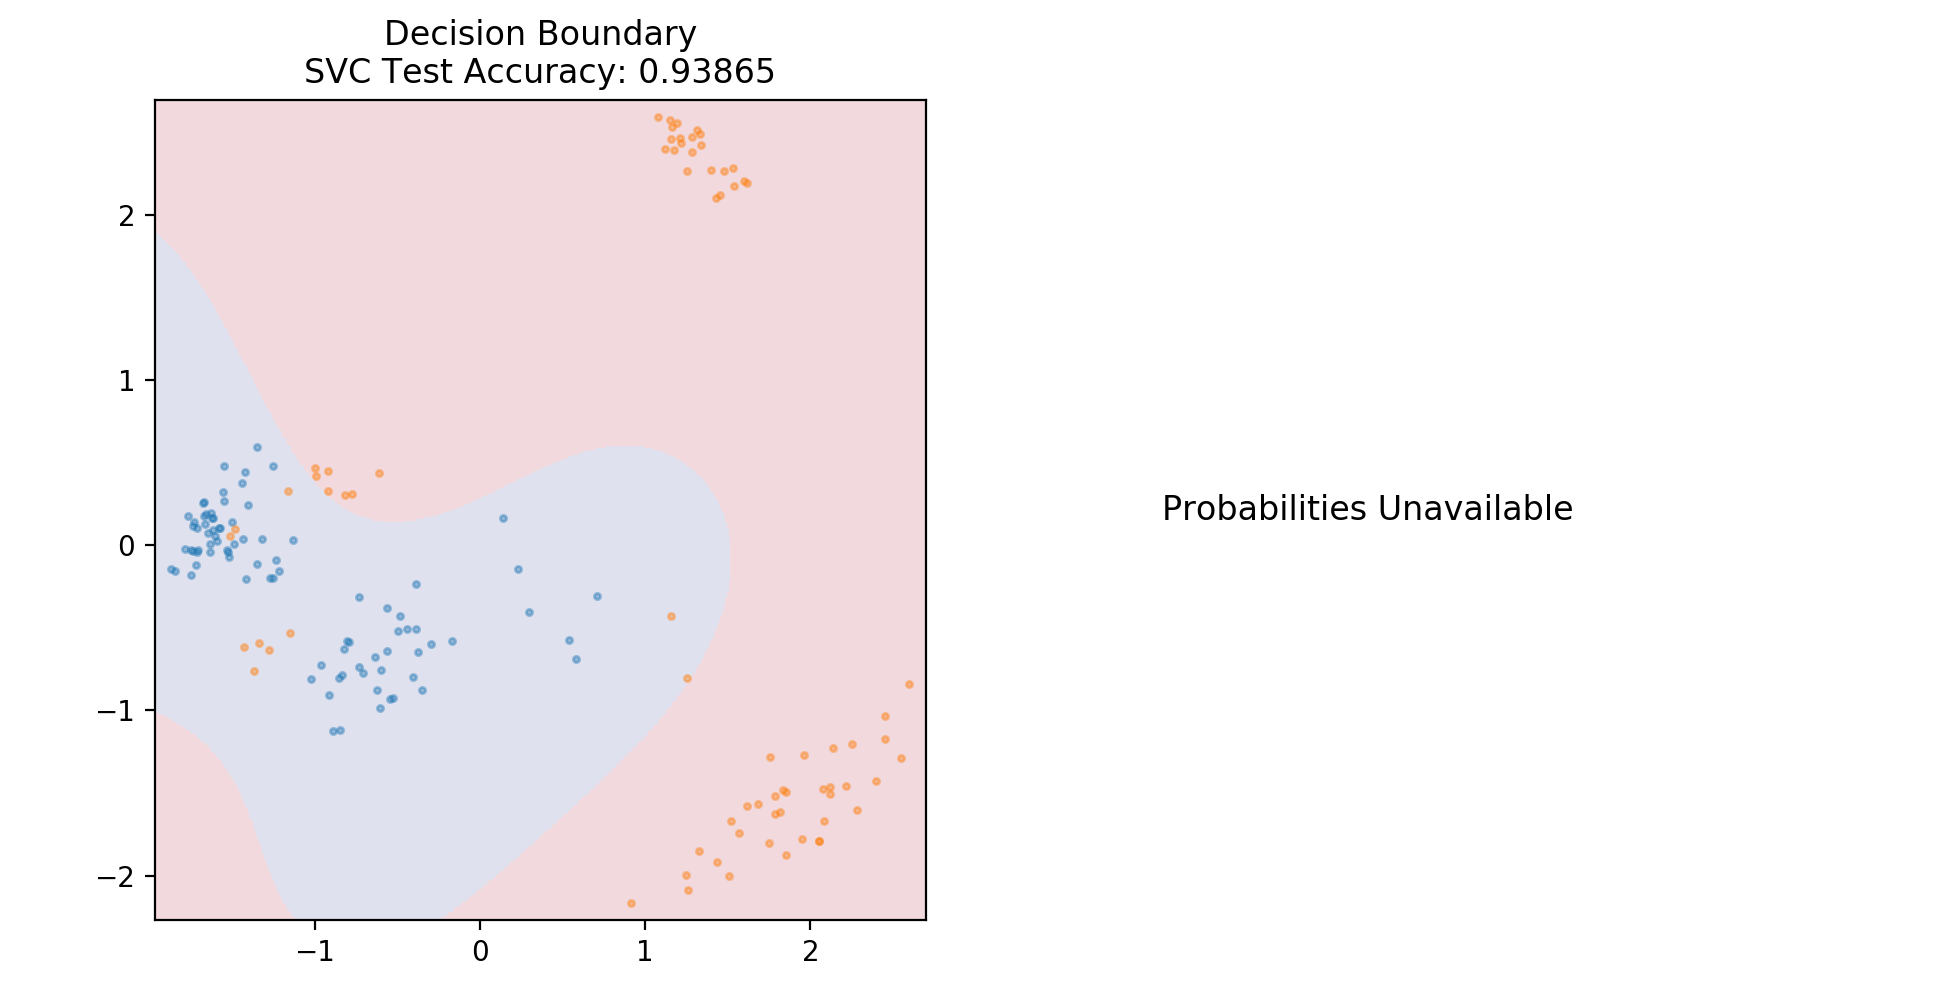

In [44]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


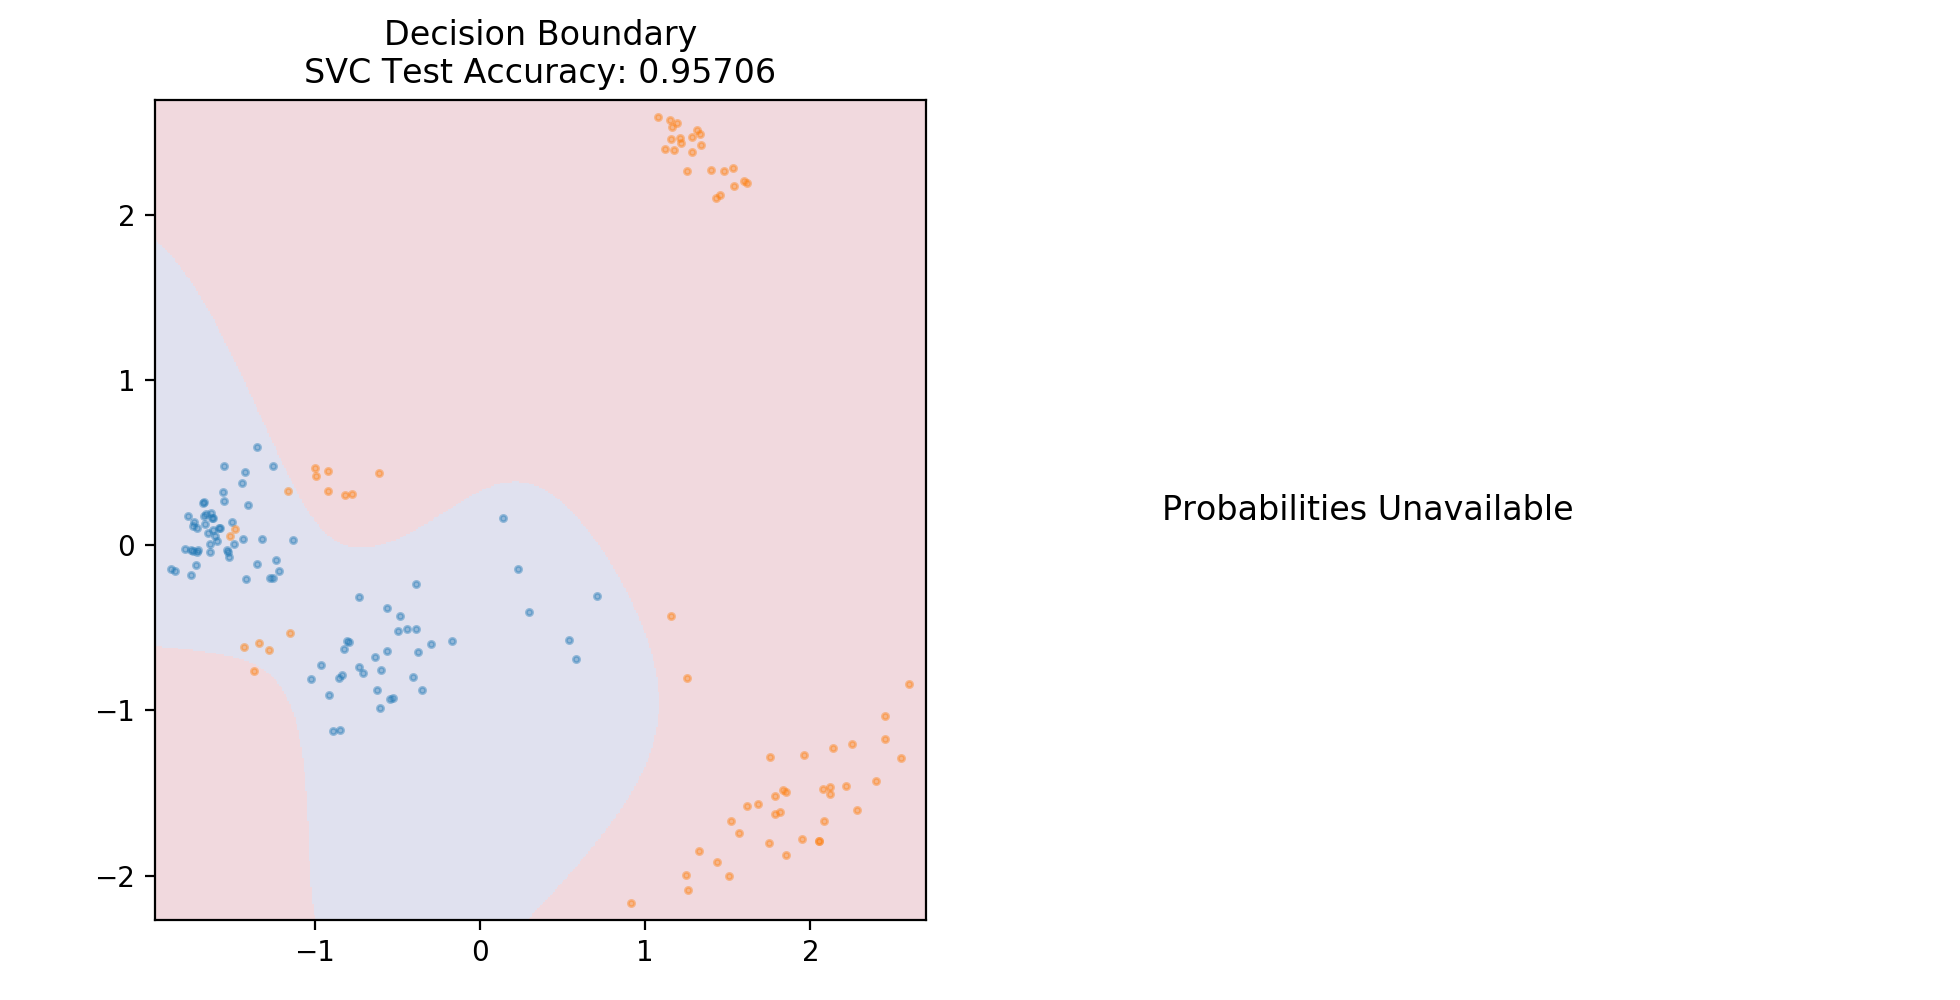

In [45]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

<IPython.core.display.Javascript object>


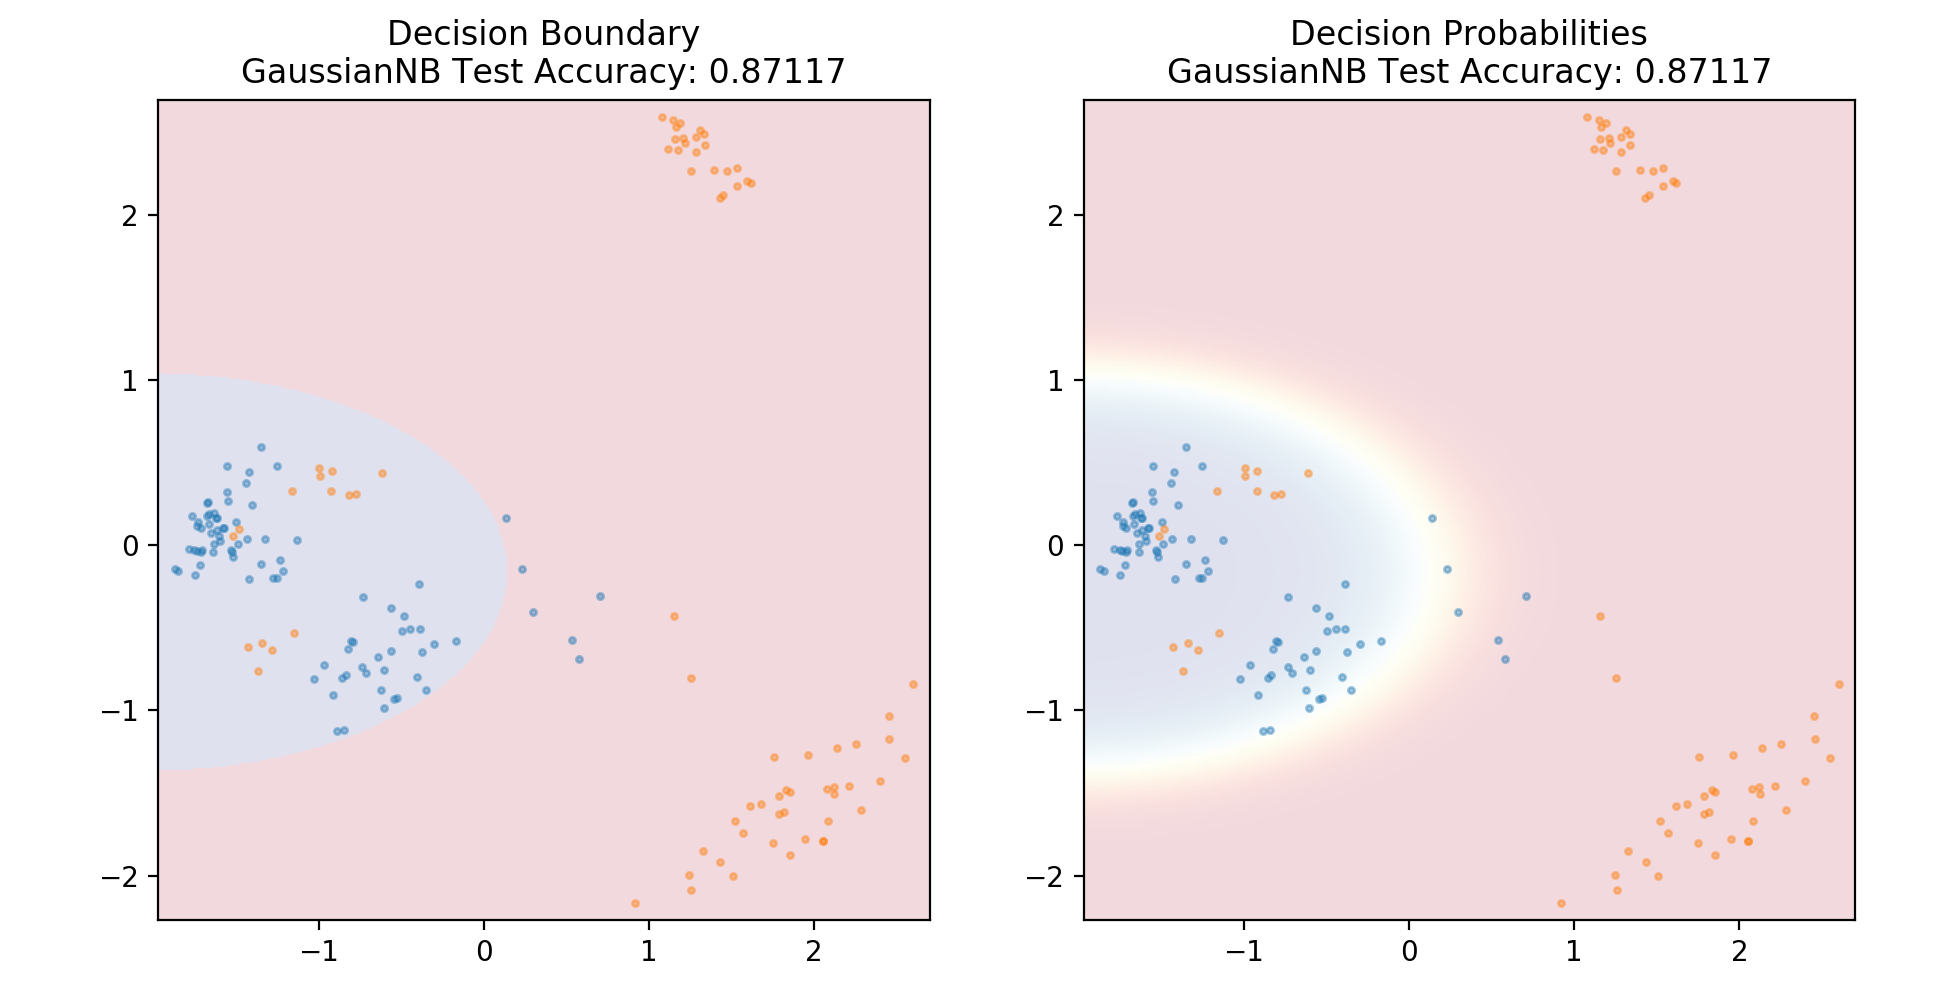

In [46]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


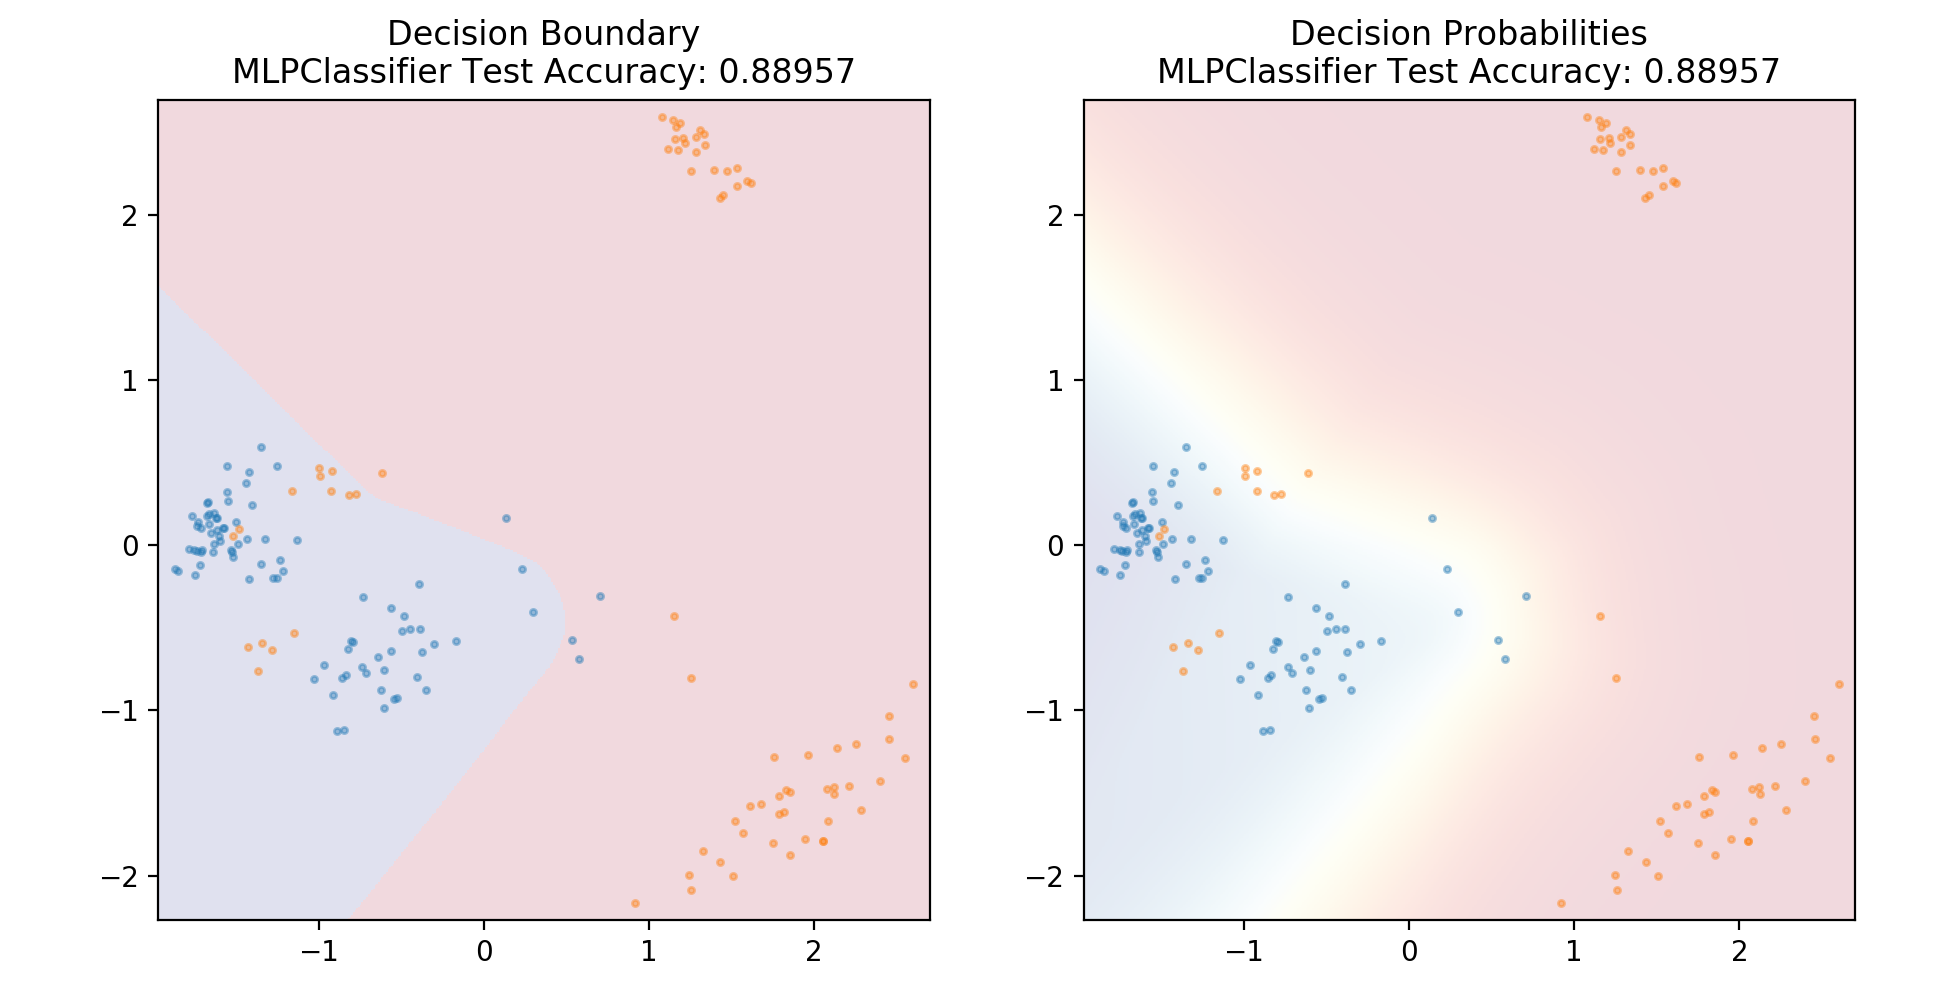

In [47]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)